In [1]:
# This means update the tensorflow lib, it will take a while!
# about 5 - 10 mins depends on your machine / network
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 462 kB 3.9 MB/s 
     |████████████████████████████████| 497.5 MB 24 kB/s 


In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# This will take a while to download.

from sklearn.datasets import fetch_openml

# Here is the fashion dataset
from tensorflow.keras.datasets import fashion_mnist



After import required libs, we can start to load up our data.

Also we can print out some basic information about the data we have.

In [3]:



X, y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

# fashion: note how the split occurs autmatically for this dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# confirm we know the size of the data
print('\nSize of features:\n', X.shape)
print('Size of labels/targets:\n',y.shape)

4431872/4422102 [==============================] - 0s 0us/step

Size of features:
 (70000, 784)
Size of labels/targets:
 (70000,)


Let's see how the sample in data looks.

In [ ]:

shapex = trainX[0].shape
print(shapex)
print(trainX[0])
shapey = trainy[0]
print(shapey)

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 2

### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Now let's plot some samples in our dataset.

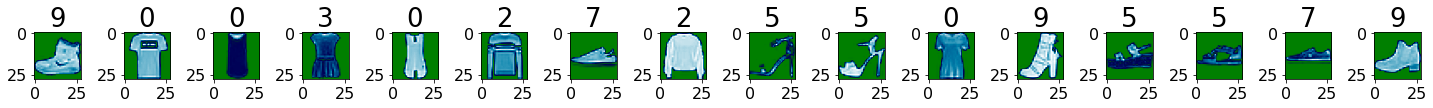

In [18]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
fig = plt.figure(figsize=(20,10))

for pic in range(16):

    # in a line
    plt.subplot(1, 16, pic+1)
    # as a grid
  
    plt.title(trainy[pic], fontsize=26)
    plt.imshow(trainX[pic].reshape(28,28), cmap = matplotlib.cm.ocean)


plt.tight_layout()

We will be using an open class from 
https://medium.com/geekculture/how-to-plot-model-loss-while-training-in-tensorflow-9fa1a1875a5 to plot the train_loss ,test_loss and train_accuracy, test_accuracy during the training.

Thanks the Author of the code!

In [20]:
from tensorflow.keras import regularizers
from IPython.display import clear_output


class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

This section below is the model building and hyperparameter tuning part. The models will take a huge ammount of time to train if you run the notebook.

In order to save time, I saved the model and the result into a github repo.

Link: https://github.com/chenqili2020/CSE404_models.git



In [21]:
import pickle 

import gzip
# This is an exmaple to save model

# pickle.dump(model, open("model_1.sav", 'wb'))
 
# This is an exmaple to load the model up
 
# with gzip.open(filepath, 'rb') as f:
#     data = pickle.load(f)

Model downloading:

In [9]:
!curl -O https://github.com/chenqili2020/CSE404_models/blob/main/model_1.sav
!curl -O https://github.com/chenqili2020/CSE404_models/blob/main/model_2.sav
!curl -O https://github.com/chenqili2020/CSE404_models/blob/main/model_3.sav
!curl -O https://github.com/chenqili2020/CSE404_models/blob/main/model_4.sav


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k    0  120k    0     0   175k      0 --:--:-- --:--:-- --:--:--  175k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k    0  120k    0     0   170k      0 --:--:-- --:--:-- --:--:--  170k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k    0  120k    0     0   206k      0 --:--:-- --:--:-- --:--:--  205k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k    0  120k    0     0   222k      0 --:--:-- --:--:-- --:--:--  222k


Load up actual model:

In [14]:
with gzip.open("model_1.sav", 'rb') as f:
    model = pickle.load(f)


OSError: ignored

In [22]:

# uncomment the code below to run on your own time.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


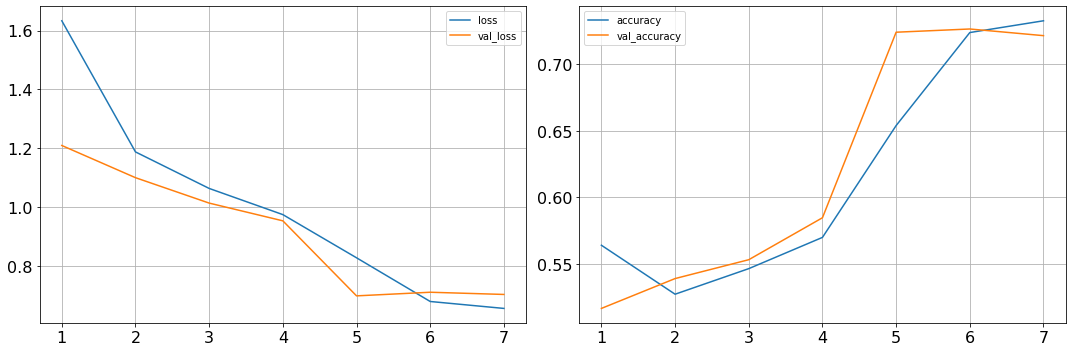

6000/6000 [==============================] - 14s 2ms/step - loss: 0.6559 - accuracy: 0.7326 - val_loss: 0.7034 - val_accuracy: 0.7214
Epoch 8/60
 579/6000 [=>............................] - ETA: 10s - loss: 0.6369 - accuracy: 0.7323

In [ ]:


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callbacks_list = [PlotLearning()]
# fit model to given data
model.fit(trainX, 
          trainy,
          batch_size = 8,
          validation_split=0.2,
          epochs=60,
          callbacks=callbacks_list
          
)

In [ ]:
test_loss1, test_acc1 = model.evaluate(testX,  testy, verbose=1)

print('\nTest accuracy:', test_acc1)

313/313 [==============================] - 1s 2ms/step - loss: 0.7793 - accuracy: 0.7327

Test accuracy: 0.732699990272522


Around epoch #30, we observed the sign for overfittingm where the Val_accuracy drop while training accuracy still increasing.When near the Epcoh #40, we can see that a huge drop in validation accuracy 
and validation loss, but this is still a decent model overall. 
Around Epcoh 55, while the validation accuracy seems to stay on the trend, but the validation loss is on an increasing trend.
60 epchs might be too much for this simple model.

Let's save the mode and then make a same model but will be adding regulizers to it & reduce the epcoh number.

INFO:tensorflow:Assets written to: ram://755230ee-04d8-4f24-ad51-9611664bcdf8/assets


In [ ]:

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64,activation='relu',kernel_regularizer= regularizers.l2(0.001) ),
    keras.layers.Dense(128, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    keras.layers.Dropout(0.01),
    keras.layers.Dense(10)
])
model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


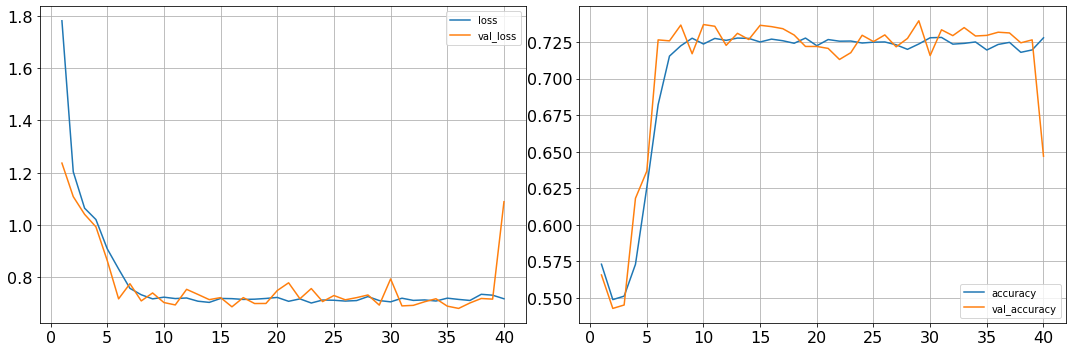

6000/6000 [==============================] - 15s 2ms/step - loss: 0.7174 - accuracy: 0.7280 - val_loss: 1.0890 - val_accuracy: 0.6469


In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callbacks_list2 = [PlotLearning()]
# fit model to given data
model2.fit(trainX, 
          trainy,
          batch_size =8,
          validation_split=0.2,
          epochs=40,
          callbacks=callbacks_list2
          
)

started from Epcoh #17, we see the spikes in validation loss.

Looks like the model doesn't improve as fast as we hope for after 15 Epcohs.

Let's save this model too and make a new more complex model. 

In [ ]:
test_loss2, test_acc2 = model2.evaluate(testX,  testy, verbose=1)

print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 1s 2ms/step - loss: 1.0867 - accuracy: 0.6463

Test accuracy: 0.6463000178337097


In [ ]:
pickle.dump(model2, open("model_2.sav", 'wb'))

INFO:tensorflow:Assets written to: ram://7e2a02b7-6fbe-45a8-973e-dc9ac85b2cd0/assets


In [ ]:

model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    keras.layers.Dense(256,activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    keras.layers.Dense(128, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10,activation="softmax")
])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 300,938
Trainable params: 300,938
Non-tr

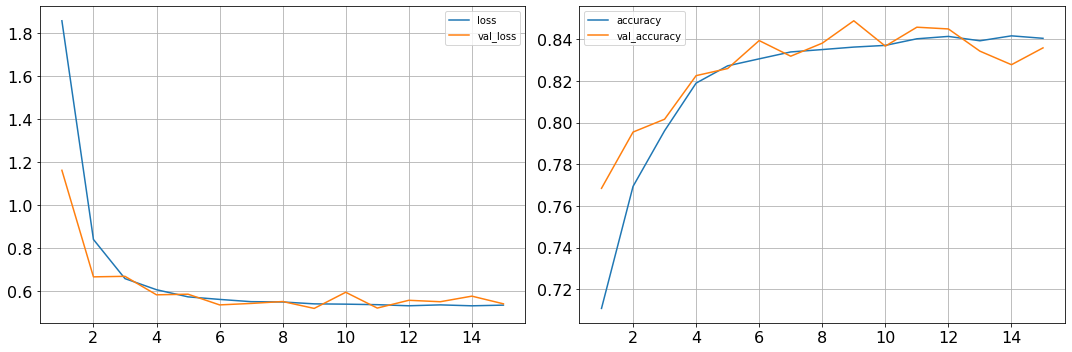

6000/6000 [==============================] - 26s 4ms/step - loss: 0.5362 - accuracy: 0.8405 - val_loss: 0.5423 - val_accuracy: 0.8359


In [ ]:
#opt = tf.keras.optimizers.SGD()

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callbacks_list3 = [PlotLearning()]
# fit model to given data
model3.fit(trainX, 
          trainy,
          batch_size = 8,
          validation_split=0.2,
          epochs=15,
          callbacks=callbacks_list3
          
)

In [ ]:
test_loss3, test_acc3 = model3.evaluate(testX,  testy, verbose=1)

print('\nTest accuracy:', test_acc3)

 19/313 [>.............................] - ETA: 0s - loss: 0.5422 - accuracy: 0.8355 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 3ms/step - loss: 0.5682 - accuracy: 0.8298

Test accuracy: 0.829800009727478


In [ ]:
pickle.dump(model3, open("model_3.sav", 'wb'))

INFO:tensorflow:Assets written to: ram://793c9091-03da-401b-a733-38f3880a1584/assets


In [ ]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(265, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10)
])
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 512)               131584    
                                                                 
 dense_20 (Dense)            (None, 265)               135945    
                                                                 
 dropout_2 (Dropout)         (None, 265)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                2660      
                                                                 
Total params: 471,149
Trainable params: 471,149
Non-tr

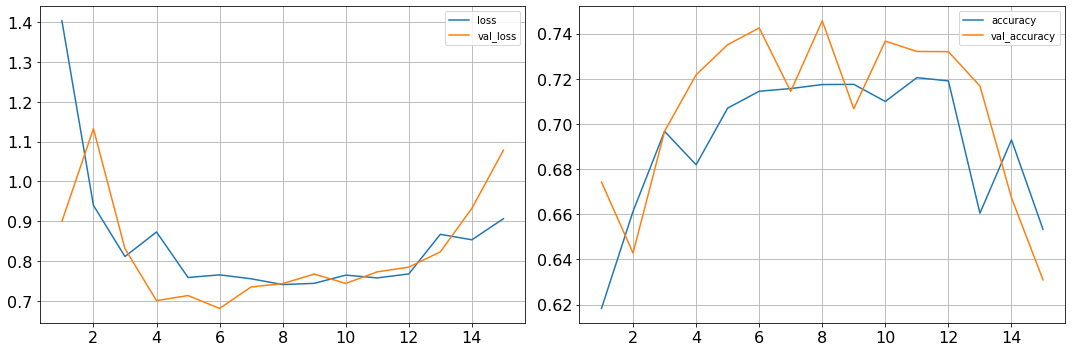

12000/12000 [==============================] - 54s 5ms/step - loss: 0.9063 - accuracy: 0.6534 - val_loss: 1.0784 - val_accuracy: 0.6310


In [ ]:


model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callbacks_list4 = [PlotLearning()]
# fit model to given data
model4.fit(trainX, 
          trainy,
          batch_size = 4,
          validation_split=0.2,
          epochs=15,
          callbacks=callbacks_list4
          
)

In [ ]:
test_loss4, test_acc4 = model4.evaluate(testX,  testy, verbose=1)

print('\nTest accuracy:', test_acc4)

313/313 [==============================] - 1s 3ms/step - loss: 1.1251 - accuracy: 0.6268

Test accuracy: 0.626800000667572


In [ ]:
pickle.dump(model4, open("model_4.sav", 'wb'))

INFO:tensorflow:Assets written to: ram://90178957-17ee-4d9e-945f-bc351965a67d/assets


In [ ]:

model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64,activation='relu',kernel_regularizer= regularizers.l2(0.001) ),
    keras.layers.Dense(128, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    keras.layers.Dense(32, activation='relu',kernel_regularizer= regularizers.l2(0.001)),
    
    keras.layers.Dense(10)
])
model5.summary()




Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                50240     
                                                                 
 dense_23 (Dense)            (None, 128)               8320      
                                                                 
 dense_24 (Dense)            (None, 32)                4128      
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 10)                330       
                                                                 
Total params: 64,074
Trainable params: 64,074
Non-trai

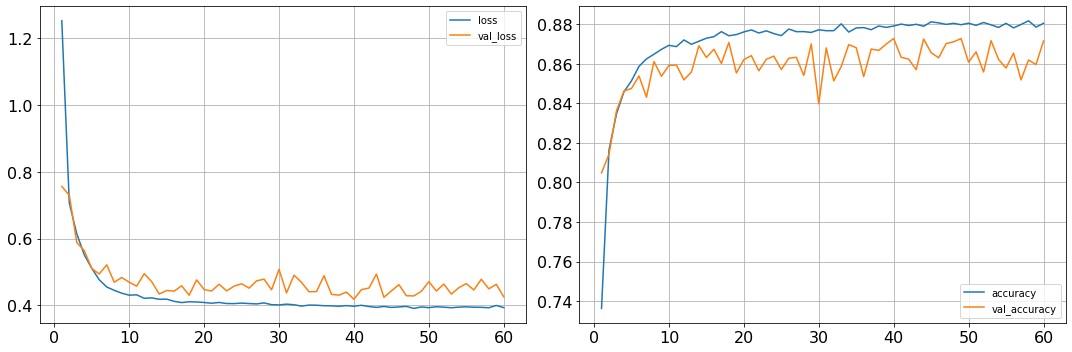

1500/1500 [==============================] - 5s 3ms/step - loss: 0.3933 - accuracy: 0.8804 - val_loss: 0.4257 - val_accuracy: 0.8715


In [ ]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
callbacks_list5 = [PlotLearning()]
# fit model to given data
model5.fit(trainX, 
          trainy,
          validation_split=0.2,
          epochs=60,
          callbacks=callbacks_list5
)



In [ ]:
#(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
#print(msu_win.shape)
import numpy as np
print("Prediction vs True Label")
for loop in range(10):
    img = testX[loop]
    img = (np.expand_dims(img,0))
    #print(img.shape)
    prediction = model5.predict(img)
    max_ind = np.argmax(prediction)
    
    
    print(" [{}] | {}".format(max_ind, testy[loop]))
    #print(" [{}] | {}".format(prediction, testy[loop]))




Prediction vs True Label
 [9] | 9
 [2] | 2
 [1] | 1
 [1] | 1
 [6] | 6
 [1] | 1
 [4] | 4
 [6] | 6
 [5] | 5
 [7] | 7


In [ ]:
print("Prediction vs True Label")
count = 0

for loop in range(100):
    img = testX[loop]
    img = (np.expand_dims(img,0))
    #print(img.shape)
    prediction = model5.predict(img)
    max_ind = np.argmax(prediction)
    if max_ind == testy[loop]: count += 1
    #plt.imshow(prediction, cmap = matplotlib.cm.ocean)
    #plt.imshow(testX[loop], cmap = matplotlib.cm.ocean)
    print(" [{}] | {}".format(max_ind, testy[loop]))
print("The accuracy with kernel regulizer of 0.001 is ", count)

Prediction vs True Label
 [1] | 9
The accuracy with kernel regulizer of 0.001 is  0
 [1] | 2
The accuracy with kernel regulizer of 0.001 is  0
 [6] | 1
The accuracy with kernel regulizer of 0.001 is  0
 [1] | 1
The accuracy with kernel regulizer of 0.001 is  1
 [1] | 6
The accuracy with kernel regulizer of 0.001 is  1
 [6] | 1
The accuracy with kernel regulizer of 0.001 is  1
 [2] | 4
The accuracy with kernel regulizer of 0.001 is  1
 [1] | 6
The accuracy with kernel regulizer of 0.001 is  1
 [2] | 5
The accuracy with kernel regulizer of 0.001 is  1
 [2] | 7
The accuracy with kernel regulizer of 0.001 is  1
 [1] | 4
The accuracy with kernel regulizer of 0.001 is  1
 [1] | 5
The accuracy with kernel regulizer of 0.001 is  1
 [2] | 7
The accuracy with kernel regulizer of 0.001 is  1
 [2] | 3
The accuracy with kernel regulizer of 0.001 is  1
 [1] | 4
The accuracy with kernel regulizer of 0.001 is  1
 [1] | 1
The accuracy with kernel regulizer of 0.001 is  2
 [1] | 2
The accuracy with kern